In [1]:
import numpy as np
from astropy.io import fits
from astropy.table import Table 
import matplotlib.pyplot as plt

In [3]:

file = './allStar-dr17-synspec_rev1.fits'
cv = fits.open(file)

# Refer to the data model to determine that the file has multiple HDUs and we only want the data array.
data = cv[1].data
# Close the remaining HDUs
cv.close()

In [10]:
# determine the integer value for the bit 23 in ASPCAPFLAG
badbits = 2**23
# select for ASPCAPFLAG bit 23 not being set and for EXTRATARG to have no bits set
gd = (np.bitwise_and(data['aspcapflag'], badbits) == 0) & (data['extratarg']==0)
# 
ind = np.where(gd)[0]

In [11]:
teff_logg_check = np.logical_and(data["TEFF"] > 0, data["LOGG"] > -10) # this checks for -9999 values
teff_logg_feh_check = np.logical_and(data["FE_H"]> -6, teff_logg_check)

indices = np.where(np.logical_and(gd, teff_logg_feh_check)) 
good = data[indices] # this only the good data now

Plotting the Calibrated Parameters

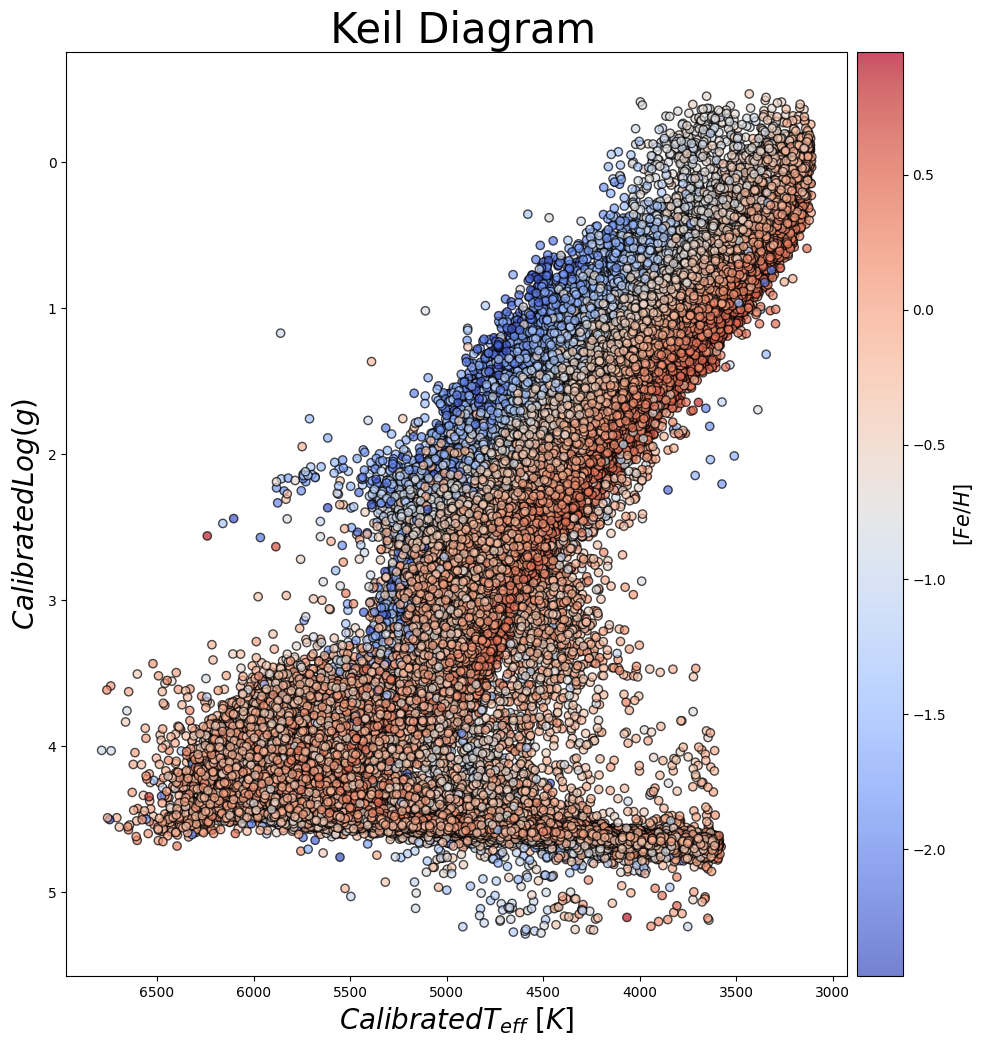

In [19]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

Teff_vals = good["TEFF"]
logg_vals = good["LOGG"]
FeH_vals  = good["FE_H"]

image = ax.scatter(Teff_vals,logg_vals, c=FeH_vals ,edgecolor='k',cmap="coolwarm",alpha=0.7)
bar = fig.colorbar(image,orientation="vertical",pad=0.01)
bar.set_label('$[Fe/H]$',size=15)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

ax.set_xlabel("$Calibrated T_{eff}$ $[K]$",size=20)
ax.set_ylabel("$Calibrated Log(g)$",size=20)
ax.set_title(" Keil Diagram", size=30)
# Uncomment line below to save a copy of the figure
plt.savefig("calibrated_hr.pdf")